In [2]:
import pandas as pd

In [4]:
bike_rentals = pd.read_csv('bike_rental_hour.csv')

In [6]:
print(bike_rentals.head())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


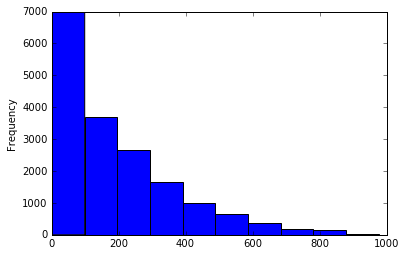

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
bike_rentals['cnt'].plot.hist()

In [49]:
bike_rentals_corr = bike_rentals.corr()
print(bike_rentals_corr)

             instant    season        yr      mnth        hr   holiday  \
instant     1.000000  0.404046  0.866014  0.489164 -0.004775  0.014723   
season      0.404046  1.000000 -0.010742  0.830386 -0.006117 -0.009585   
yr          0.866014 -0.010742  1.000000 -0.010473 -0.003867  0.006692   
mnth        0.489164  0.830386 -0.010473  1.000000 -0.005772  0.018430   
hr         -0.004775 -0.006117 -0.003867 -0.005772  1.000000  0.000479   
holiday     0.014723 -0.009585  0.006692  0.018430  0.000479  1.000000   
weekday     0.001357 -0.002335 -0.004485  0.010400 -0.003498 -0.102088   
workingday -0.003416  0.013743 -0.002196 -0.003477  0.002285 -0.252471   
weathersit -0.014198 -0.014524 -0.019157  0.005400 -0.020203 -0.017036   
temp        0.136178  0.312025  0.040913  0.201691  0.137603 -0.027340   
atemp       0.137615  0.319380  0.039222  0.208096  0.133750 -0.030973   
hum         0.009577  0.150625 -0.083546  0.164411 -0.276498 -0.010588   
windspeed  -0.074505 -0.149773 -0.0087

In [12]:
def assign_label(nHour):
    retval = 0
    if nHour>=6 and nHour < 12:
        retval = 1
    elif nHour >= 12 and nHour <18:
        retval = 2
    elif nHour >= 18 and nHour < 24:
        retval = 3
    else:
        retval = 4
    return retval

bike_rentals['time_label'] = bike_rentals['hr'].apply(assign_label)

print(bike_rentals['time_label'].head())

0    4
1    4
2    4
3    4
4    4
Name: time_label, dtype: int64


In [13]:
from sklearn.metrics import mean_squared_error

In [14]:
import numpy as np

In [15]:
train = bike_rentals.sample(frac=0.8, random_state=1)

In [17]:
is_in_train = bike_rentals.index.isin(train.index)
test = bike_rentals.loc[~is_in_train]

print(train.shape[0])
print(test.shape[0])
print(bike_rentals.shape[0])

13903
3476
17379


In [68]:
def sel_col_with_corr_bar(nCorr):
    cols = list()
    """
    Dropping casual, registered columns since they are the ones which adds up to cnt col.
    """
    columns = bike_rentals.columns.drop(['cnt', 'casual','dteday','registered'])
    for col in columns:
        if abs(bike_rentals_corr['cnt'][col]) >= nCorr:
            cols.append(col)
    return cols

In [77]:
#columns = columns.drop(['mnth','holiday','weekday','workingday','temp','windspeed'])
columns = sel_col_with_corr_bar(0.10)

if 'temp' in columns and 'atemp' in columns:
    columns.remove('temp')

print(columns)

['instant', 'season', 'yr', 'mnth', 'hr', 'weathersit', 'atemp', 'hum', 'time_label']


In [72]:
from sklearn.linear_model import LinearRegression
lrm = LinearRegression()
lrm.fit(train[columns], train['cnt'])
predictions = lrm.predict(test[columns])
lrm_rmse = np.sqrt(mean_squared_error(test['cnt'], predictions))

print(lrm_rmse)


130.71052076745076


In [71]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(splitter='random', 
                            max_features='auto', 
                            random_state=1, 
                            min_samples_leaf=15,
                           )
dtr.fit(train[columns], train['cnt'])
predictions = dtr.predict(test[columns])
dtr_rmse = np.sqrt(mean_squared_error(test['cnt'], predictions))

print(dtr_rmse)

99.7597958185334


In [78]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators = 50,
                           min_samples_leaf=10,
                           max_features='auto',
                           random_state=1)
rfr.fit(train[columns],train['cnt'])
predictions = rfr.predict(test[columns])
rfr_rmse = np.sqrt(mean_squared_error(test['cnt'], predictions))

print(rfr_rmse)

83.69568405044454
